In [20]:
import numpy as np
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Distributions
---

In [12]:
data = pd.read_csv('data/cp.csv')

In [14]:
data.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,80531,313 - CHEST PAIN,220108,MILTON HOSPITAL INC,199 REEDSDALE ROAD,MILTON,MA,2186,MA - Boston,43,6760.53,3547.00,2633.04
1,82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
2,82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53
3,82207,313 - CHEST PAIN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,AL - Dothan,34,6417.20,2808.08,1872.38
4,82208,313 - CHEST PAIN,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,33,13311.78,2997.00,2113.84


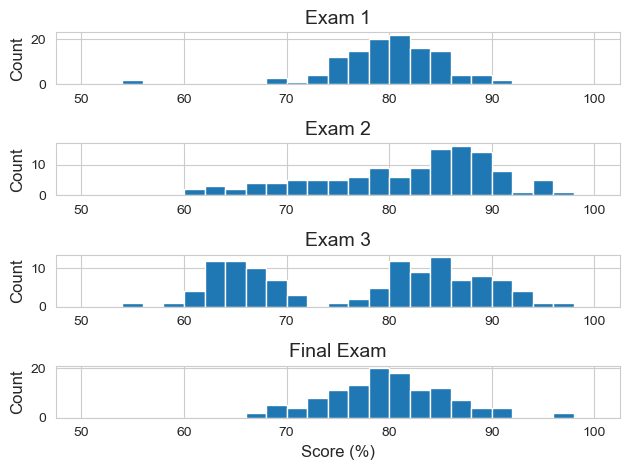

In [24]:
np.random.seed(1)
fig, axes = plt.subplots(nrows=4, ncols=1)

plt.subplot(4,1,1)
mu, sigma = 80,5
exam_1 = np.random.normal(mu, sigma, 120)
exam_1[50] = 55
exam_1[51] = 55
count, bins, ignored = plt.hist(exam_1, 25, range=[50, 100])
plt.ylabel("Count", fontsize=12)
plt.title("Exam 1", fontsize=14)

plt.subplot(4,1,2)
mu, sigma = 85,5
exam_2_norm = np.random.normal(mu, sigma, 85)
exam_2_u = np.random.uniform(60, 80, 35)
exam_2 = np.concatenate((exam_2_norm, exam_2_u))
count, bins, ignored = plt.hist(exam_2, 25, range=[50, 100])
plt.ylabel("Count", fontsize=12)
plt.title("Exam 2", fontsize=14)

plt.subplot(4,1,3)
mu, sigma = 85,5
exam_3_norm = np.random.normal(mu, sigma, 70)
exam_3_u = np.random.normal(65, 3.5, 50)
exam_3 = np.concatenate((exam_3_norm, exam_3_u))
count, bins, ignored = plt.hist(exam_3, 25, range=[50, 100])
plt.ylabel("Count", fontsize=12)
plt.title("Exam 3", fontsize=14)

plt.subplot(4,1,4)
mu, sigma = 80,6
exam_4_norm = np.random.normal(mu, sigma, 120)
exam_4 = np.concatenate((exam_4_norm, np.array([96,96])))
count, bins, ignored = plt.hist(exam_4, 25, range=[50, 100])
plt.xlabel("Score (%)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Final Exam", fontsize=14)

fig.tight_layout()
plt.show()

In [46]:
ic.configureOutput(includeContext=False)
for exam in (exam_1, exam_2, exam_3, exam_4):
    ic(np.round(np.average(exam),2))
    ic(np.round(np.median(exam),2))
    ic(np.round(np.min(exam),2))
    ic(np.round(np.max(exam),2))
    ic(np.round(np.max(exam)-np.min(exam),2))


ic| np.round(np.average(exam),2): 79.76
ic| np.round(np.median(exam),2): 80.24
ic| np.round(np.min(exam),2): 55.0
ic| np.round(np.max(exam),2): 90.93
ic| np.round(np.max(exam)-np.min(exam),2): 35.93
ic| np.round(np.average(exam),2): 81.62
ic| np.round(np.median(exam),2): 83.97
ic| np.round(np.min(exam),2): 61.36
ic| np.round(np.max(exam),2): 97.64
ic| np.round(np.max(exam)-np.min(exam),2): 36.28
ic| np.round(np.average(exam),2): 77.02
ic| np.round(np.median(exam),2): 80.39
ic| np.round(np.min(exam),2): 55.46
ic| np.round(np.max(exam),2): 97.99
ic| np.round(np.max(exam)-np.min(exam),2): 42.53
ic| np.round(np.average(exam),2): 80.09
ic| np.round(np.median(exam),2): 79.75
ic| np.round(np.min(exam),2): 66.75
ic| np.round(np.max(exam),2): 101.44
ic| np.round(np.max(exam)-np.min(exam),2): 34.69


## Quartiles
---

In [14]:
import numpy as np
from itertools import compress
dataset_one = [50, 10, 4, -3, 4, -20, 2]
#Sorted dataset_one: [-20, -3, 2, 4, 4, 10, 50]

dataset_two = [24, 20, 1, 45, -15, 40]

dataset_one_q2 = 4
dataset_two_q2 = 22
#Define the first and third quartile of both datasets here:
dataset_one_q1 = np.median(np.sort(dataset_one))

In [43]:
def find_quartile(dataset, quartile):
    dataset = np.sort(dataset)
    median_index = np.argsort(dataset)[len(dataset)//2]
    dataset_q2 = dataset[median_index]
    
    if quartile==1:
        data_slice = dataset[:median_index]
    elif quartile==3:
        data_slice = dataset[median_index:]
    else:
        print("Only acceptable inputs for quartile are 1,3")
        return 0
    return np.median(data_slice)

## Summary Statistics
---

In [81]:
import pandas as pd

# Read NYC Trees Data
nyc_trees = pd.read_csv("data/nyc_tree_census.csv")

# Get tree counts by neighborhood
tree_counts = nyc_trees['neighborhood'].value_counts()

# Get neighborhoods with most trees
greenest_neighborhood = tree_counts.index[0]

In [80]:
tree_counts.index[0]

"Annadale-Huguenot-Prince's Bay-Eltingville"